**Task 1: Бинарный классификатор**

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Препроцессинг данных**

**Скачайте данные, расположенные в: datasets/checker_timestamp.csv**

**Создайте датафрейм `df` со столбцами: `date`, `am`, `pm`, `target`, где `date` – это дата дня, `am` – количество коммитов, совершенных до полудня (целое число), `pm` – количество коммитов, совершенных после полудня (целое число), `target` – принимает значения `weekend`/`working_day`.**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 13 Введение в машинное обучение/Task 1: Бинарный классификатор/data/checker_timestamp.csv',
                parse_dates=['timestamp'])
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [5]:
df['date'] = df.timestamp.dt.date
df['target'] = ['weekend' if x == 'Saturday' or x == 'Sunday' else 'working_day' for x in df.timestamp.dt.day_name()]
df['time'] = df.timestamp.dt.time
df['am'] = df.time <= datetime.time(hour=12, minute=0, second=0, microsecond=0)
df['pm'] = df.time > datetime.time(hour=12, minute=0, second=0, microsecond=0)

In [6]:
df = df.groupby(by=['date', 'target'], as_index=False).agg({'am': 'sum', 'pm': 'sum'})
df

,date,target,am,pm
0,2020-04-17,working_day,21,2
1,2020-04-18,weekend,1,68
2,2020-04-19,weekend,18,15
3,2020-04-20,working_day,2,23
4,2020-04-21,working_day,0,25
5,2020-04-22,working_day,0,28
6,2020-04-23,working_day,10,33
7,2020-04-24,working_day,2,14
8,2020-04-25,weekend,30,74
9,2020-04-26,weekend,28,233


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35 non-null     object
 1   target  35 non-null     object
 2   am      35 non-null     int64 
 3   pm      35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


**2. Разведочный анализ**

**Создайте график, где ось икс – это `am`, а ось игрек – это `pm`. Каждая точка – это конкретный день. Рабочие дни и выходные должны иметь разные цвета на графике.**

**Глядя на график, как вы думаете будет ли просто классифицировать дни, используя только эти два признака? Напишите свой ответ в markdown-ячейке в конце этой секции: "да, это легко" или "нет, это нелегко".**

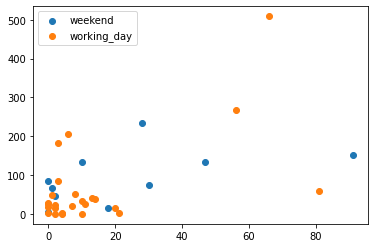

In [8]:
groups = df.groupby("target")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()

**Нет, это нелегко.**

**3. Логистическая регрессия**

**Обучите логистическую регрессию, используя в качестве признаков `am` и `pm`. Учтите параметры: `random state=21`, `fit_intercept=False`.**

In [9]:
logreg_fit = LogisticRegression(C=1.0, 
                            fit_intercept=False, 
                            random_state=21,
                            max_iter=100).fit(df[['am', 'pm']], df.target)

**Сделайте предсказания в отношении каждого дня из вашего датасета и сохраните эти значения в датафрейм, в новый столбец `predict`.**

In [10]:
df['predict'] =  logreg_fit.predict(df[['am', 'pm']])
df

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day
5,2020-04-22,working_day,0,28,working_day
6,2020-04-23,working_day,10,33,working_day
7,2020-04-24,working_day,2,14,working_day
8,2020-04-25,weekend,30,74,working_day
9,2020-04-26,weekend,28,233,working_day


**Сохраните датафрейм в файл в подпапку `data` под названием `am_pm.csv`.**

In [11]:
df.to_csv('/content/drive/MyDrive/Школа 21/DS_project 13 Введение в машинное обучение/Task 1: Бинарный классификатор/data/am_pm.csv',
         index=False)

**Постройте еще один график, как в прошлый раз, но теперь цвет должен опираться на значения столбца `predict`**

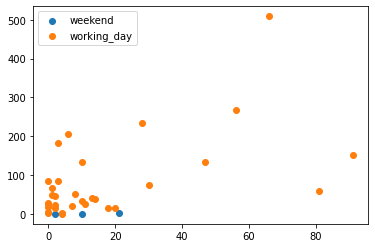

In [12]:
groups = df.groupby("predict")
for name, group in groups:
    plt.scatter(group["am"], group["pm"], label=name)
plt.legend()

**Глядя на график, как вы думаете: прогноз получился достаточно точный? Напишите свой ответ в markdown-ячейке в конце этой секции: "да, это точно" или "нет, это неточно".**

Нет, это неточно.

**4. Оценка модели**

**Посчитайте `accuracy` прогнозов вашей модели.**

In [13]:
accuracy_score(df.target, df.predict)

0.6285714285714286

**Посчитайте `accuracy` для наивного случая, когда ваш прогноз – это просто значение самого популярного класса дня для всех наблюдений.**

In [14]:
most_popular = df.target.value_counts().index[0]
naive_case = np.full_like(df.target, most_popular)
naive_case

array(['working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day'], dtype=object)

In [15]:
accuracy_score(df.target, naive_case)

0.7142857142857143

**Сравнив значения этих двух метрик, как вам кажется, модель сделала точный прогноз? Напишите свой ответ в markdown-ячейке в конце этой секции: "да, это точно" или "нет, это неточно".**

Нет, это неточно.